# Generating GIFs
If you provide a function that renders each state of a model to an image, you can extract a GIF from this. The previous notebook with gymnasium was an example of this, but you can do it for any model! You can either provide a scheduler, or a path.

In this example, we will generate an image from the die dtmc; the initial state is a question mark and the outcomes of the die are a picture of the die.

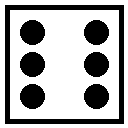

In [2]:
from stormvogel import *
from time import sleep
import IPython.display as ipd

for i in range(7):
    ipd.clear_output(wait=True)
    ipd.display(examples.generate_dice_image(i))
    sleep(0.5)

In [11]:
def state_to_image(s: State):
    if s.is_initial():
        return examples.generate_dice_image(0) # Question mark.
    else:
        return examples.generate_dice_image(s.features["rolled"]) # Die image

In [12]:
mdp = examples.create_die_dtmc()
vis = show(mdp, layout=Layout("layouts/die.json"))

Output()

Output()

Now when we roll the die, we start in the initial state (question mark), and we go to a state where we rolled a result.

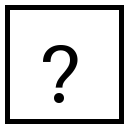

In [18]:
# Try reloading this cell, it may give a different dice roll.
import IPython.display as ipd
filename = extensions.render_model_gif(mdp, state_to_image, None, None)
ipd.display(ipd.Image(filename))